In [1]:
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
import pickle
import climtools_lib as ctl
import xarray as xr
import glob

#############################################################################

cart_out = '/home/fabiano/Research/lavori/BOTTINO/'
cart_out = cart_out + 'amoc/'

allru = ['b990', 'b025', 'b050', 'b065', 'b080', 'b100']
colors = ['lightslategray', 'forestgreen', 'orange', 'chocolate', 'maroon', 'violet']

amoc_2D = pickle.load(open('/home/fabiano/Research/lavori/BOTTINO/amoc/amoc_2D_1000.p', 'rb'))

libgfortran.so.3: cannot open shared object file: No such file or directory
No DISPLAY variable set. Switching to agg backend


In [2]:
carto = '/nas/archive_CMIP6/CMIP6/model-output/EC-Earth-Consortium/EC-Earth3/piControl/ocean/Omon/r1i1p1f1/'
moc_pi = xr.open_mfdataset(carto + 'msftyz/msftyz*nc', use_cftime = True)['msftyz']
moc_pi = moc_pi.sel(time = slice('2330-01-01', '2380-01-01'))
moc_pi = moc_pi.mean('time')

In [5]:
moc_pi = moc_pi.compute()

<xarray.DataArray 'msftyz' (basin: 3, lev: 75, rlat: 292)>
array([[[ 0.0000000e+00,  1.6999596e+06,  4.0355430e+06, ...,
         -2.7256675e+06, -3.6341940e-11,  0.0000000e+00],
        [ 0.0000000e+00,  6.1364450e+06,  9.3891290e+06, ...,
         -1.4293059e+06, -2.6365066e-11,  0.0000000e+00],
        [ 0.0000000e+00,  1.0608251e+07,  1.4705795e+07, ...,
         -7.9649331e+05, -2.8296832e-11,  0.0000000e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          1.7676772e+09,  1.7690034e+09,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          1.7521212e+09,  1.7544259e+09,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          1.7361413e+09,  1.7386906e+09,  0.0000000e+00],
...
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]], dtype=float32)
Coordinates:
    sector   (basin) |S21 b'global_ocean' ... b'indian_pacific_ocean'
  * lev      (lev) float64 0.0 1.024 2.103 3.251 ... 5.393e+03 5.596e+03 5.8e+03
  * rlat     (rlat) float64 -78.01 -77.82 -77.62 -77.42 ... 89.15 89.37 89.59
Dimensions without coordinates: basin

### Global MOC for pi

In [10]:
#%matplotlib inline
fig = plt.figure()
moc_pi.sel(basin = 0).plot(y = 'lev', vmax = 2e10)
plt.gca().invert_yaxis()
plt.gca().set_facecolor('white')
# plt.gca().set_alpha(0.)
# fig.patch.set_facecolor('white')
# fig.patch.set_alpha(0.)
fig.savefig(cart_out + 'global_moc_pi.png', facecolor='white', transparent=False)

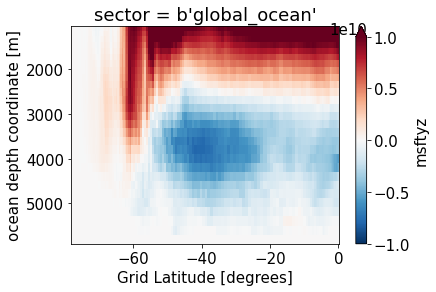

In [16]:
moc_pi.sel(basin = 0, lev = slice(1000., None), rlat = slice(None, 0)).plot(y = 'lev', vmax = 1e10)
plt.gca().invert_yaxis()

### And in the bottins

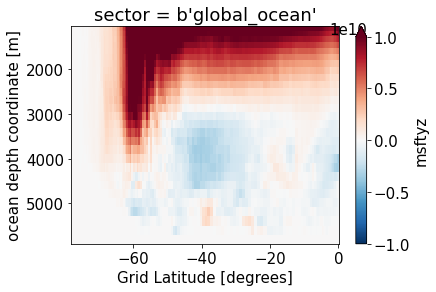

In [21]:
amoc_2D[('b100', 'ini')].sel(basin = 0, lev = slice(1000., None), rlat = slice(None, 0)).plot(y = 'lev', vmax = 1e10)
plt.gca().invert_yaxis()

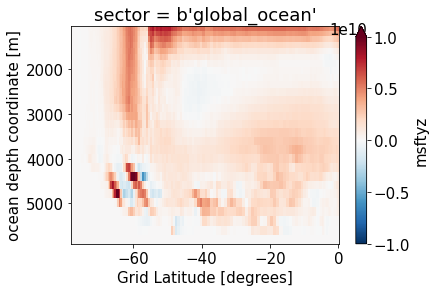

In [22]:
amoc_2D[('b100', 'fin')].sel(basin = 0, lev = slice(1000., None), rlat = slice(None, 0)).plot(y = 'lev', vmax = 1e10)
plt.gca().invert_yaxis()

In [6]:
fig = plt.figure()
amoc_2D[('b100', 'ini')].sel(basin = 0).plot(y = 'lev', vmax = 2e10)
plt.gca().invert_yaxis()
plt.gca().set_facecolor('white')
fig.savefig(cart_out + 'global_moc_b100_ini.png', facecolor='white', transparent=False)

In [7]:
fig = plt.figure()
amoc_2D[('b100', 'fin')].sel(basin = 0).plot(y = 'lev', vmax = 2e10)
plt.gca().invert_yaxis()
plt.gca().set_facecolor('white')
fig.savefig(cart_out + 'global_moc_b100_fin.png', facecolor='white', transparent=False)

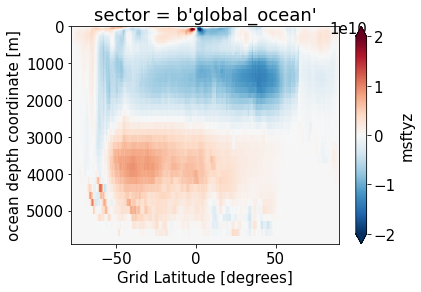

In [26]:
(amoc_2D[('b100', 'fin')]-moc_pi).sel(basin = 0).plot(y = 'lev', vmax = 2e10)
plt.gca().invert_yaxis()

### Diff wrt pi:
the abyssal cell is reduced a lot

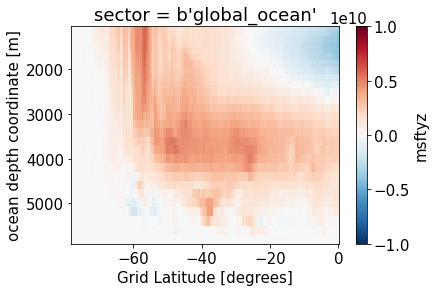

In [18]:
diff = amoc_2D[('b100', 'ini')] - moc_pi
diff.sel(basin = 0, lev = slice(1000., None), rlat = slice(None, 0)).plot(y = 'lev', vmax = 1e10)
plt.gca().invert_yaxis()

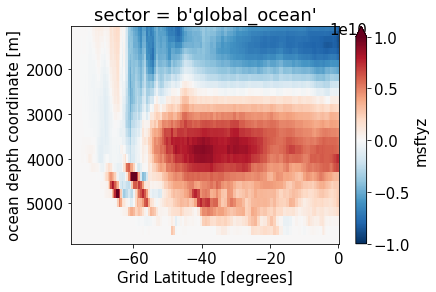

In [19]:
diff = amoc_2D[('b100', 'fin')] - moc_pi
diff.sel(basin = 0, lev = slice(1000., None), rlat = slice(None, 0)).plot(y = 'lev', vmax = 1e10)
plt.gca().invert_yaxis()